# Tensor Flow on Confusion Matrix

Tensor flow is a free open-source library that was developed by researchers and engineers working on the Google Brain team withing Google's Machine Tintellidence Research team. It is used for dataflow and differentiable programming and can perform a range of tasks. It allows developers to create large scale neural networks with many layers and it is mainly used for Classification, Perception, Understanding, Discovering, Prediction and Creation


|![MNIST Dataset](img/img1.png) |
|:--:| 
|*Tensor Flow Banner*|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


Running the MNIST data set using Tenserflow's Keras API and seperating the training images and the testing images. x_train and x_test contains RGB codes from 0 to 255 while y_train and y_test contains labels from 0 to 9

|![title](img/1-16.png)|
|:--:| 
|*Training and Testing in a Dataset*|

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


We have reshaped the dataset by using a 4-dims numpy array. When working with neural network models we must normalize the data. By dividing the RGB codes to 255 we can achive normalization. In the following code we start building the Convolutional Neural Network by using Sequential mode from the keras package. With the model we will use
    - Conv2D
    - MaxPooling2D
    - Flatten
    - Dense
    - Dropout
    
By using Conv2D we take out original image (5,5) and filtering it with MaxPooling2D to a smaller pixel (3,3). Dropout layer determines the overfitting while Flatten is used to change a 2D array to a 1D. The dense layer located in the last line the cell must maintain 10 neurons at all times since there is only number from 0-9. By experimenting with kernel size, pool size, dropout rate the number of neurons in the first dense layer we can gain better results

In [5]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5, validation_data=(x_train, y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.1825 - accuracy: 0.9459 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 2/5
60000/60000 [==============================] - 15s 253us/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0314 - val_accuracy: 0.9900
Epoch 3/5
60000/60000 [==============================] - 16s 273us/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0238 - val_accuracy: 0.9925
Epoch 4/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0160 - val_accuracy: 0.9951
Epoch 5/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0118 - val_accuracy: 0.9961


### Creating a Confusion Matrix Using Tensor Flow

In [7]:
y_pred=model.predict_classes(x_train)
con_mat = tf.math.confusion_matrix(labels=y_train, predictions=y_pred).numpy()

In [8]:
classes=[0,1,2,3,4,5,6,7,8,9]

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

con_mat_df

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00
1,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00
2,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.00
5,0.0,0.0,0.0,0.0,0.00,0.99,0.0,0.0,0.0,0.00
6,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.00
7,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.0,0.0,0.00
8,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,0.00
9,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.99


The diagonal elements represent the number of points for which the predicted label if equal to the true label.

### Using matplotlib to plot confusion matrix and Seaborn to create a heatmap

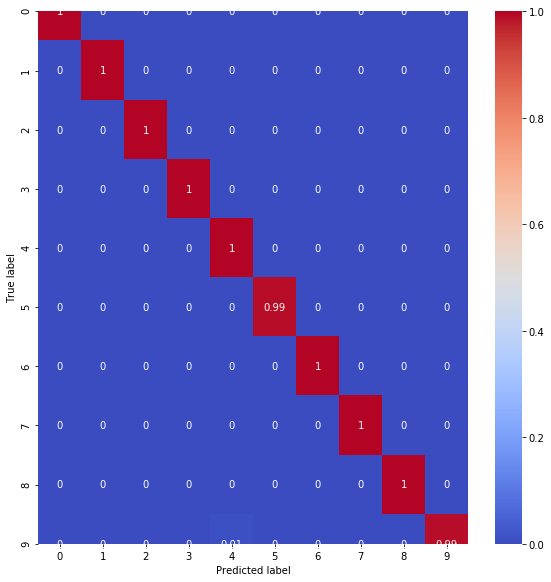

In [9]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap='coolwarm')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### References

#### 1. https://towardsdatascience.com/confusion-matrix-in-object-detection-with-tensorflow-b9640a927285
#### 2. https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
#### 3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py